# Crop Production Analysis In India

To analyze crop production in India, we can use various datasets that provide information on crop production, states, districts, and crop years. Here, we'll go through the process step-by-step, including how to analyze the data and compare different metrics.

# Data Collection
You can get crop production data from various sources, such as the Indian government's data portal (data.gov.in) or the Food and Agriculture Organization (FAO). For this example, let's we have to take a dataset in CSV format.

# Load the Data
First, we need to load the data into a pandas DataFrame. We'll use Python and pandas for data manipulation and analysis.

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
# Load the dataset

file_path = '/content/sample_data/Crop Production data.csv'

In [107]:
df = pd.read_csv(file_path)

# Explore the Data

In [108]:
# Display the first few rows and the data types

df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [109]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [110]:
# Get a summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34297 entries, 0 to 34296
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     34297 non-null  object 
 1   District_Name  34297 non-null  object 
 2   Crop_Year      34297 non-null  int64  
 3   Season         34297 non-null  object 
 4   Crop           34296 non-null  object 
 5   Area           34296 non-null  float64
 6   Production     34213 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [111]:
# Get basic statistics

df.describe()

,Crop_Year,Area,Production
count,34297.000000,34296.000000,3.421300e+04
mean,2005.961338,7381.595611,5.929376e+05
std,5.122459,28578.280400,1.486502e+07
min,1997.000000,0.200000,0.000000e+00
25%,2002.000000,90.000000,1.120000e+02
50%,2006.000000,505.500000,8.070000e+02
75%,2011.000000,2704.250000,6.800000e+03
max,2014.000000,877029.000000,7.801620e+08


# Clean and Transform the Data

Next, we will clean the data by handling missing values, converting data types if necessary, and creating new features.

In [112]:
# Check for missing values

df.isnull().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              1
Area              1
Production       84
dtype: int64

In [113]:
# Drop rows with missing values

data = df.dropna()

In [114]:
# fill them with appropriate value

df.fillna(0)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
34292,Bihar,KATIHAR,2014,Rabi,Sunflower,964.0,1401.0
34293,Bihar,KATIHAR,2014,Rabi,Wheat,39459.0,69873.0
34294,Bihar,KATIHAR,2014,Summer,Maize,20299.0,110570.0
34295,Bihar,KATIHAR,2014,Summer,Moong(Green Gram),3512.0,4060.0


In [115]:
# Re-Checking missing values

df.isnull().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              1
Area              1
Production       84
dtype: int64

In [116]:
# Display the cleaned data

df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [117]:

# Display the cleaned data types

print(df.dtypes)

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object


In [118]:
# Convert necessary columns to appropriate data types
df['Crop_Year'] = df['Crop_Year'].astype(int)
df['Crop_Year']

0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
34292    2014
34293    2014
34294    2014
34295    2014
34296    2014
Name: Crop_Year, Length: 34297, dtype: int64

# Data Aggregation
Aggregate the data to get the total production for each state, crop, and year.

In [119]:
# Total production by state

production_by_state = df.groupby('State_Name')['Production'].sum().reset_index()
production_by_state

,State_Name,Production
0,Andaman and Nicobar Islands,7.182232e+08
1,Andhra Pradesh,1.732459e+10
2,Arunachal Pradesh,6.823913e+06
3,Assam,2.111752e+09
4,Bihar,1.247844e+08


In [120]:
# Total production by district

production_by_district = df.groupby('District_Name')['Production'].sum().reset_index()
production_by_district

,District_Name,Production
0,ANANTAPUR,8.150159e+07
1,ANJAW,1.108063e+05
2,ARARIA,1.243827e+07
3,ARWAL,1.095356e+06
4,AURANGABAD,9.347487e+06
...,...,...
71,VISAKHAPATANAM,1.010412e+09
72,VIZIANAGARAM,4.741696e+08
73,WEST GODAVARI,4.287727e+09
74,WEST KAMENG,2.031407e+05


In [121]:
# Total production by crop

production_by_crop = df.groupby('Crop')['Production'].sum().reset_index()
production_by_crop

,Crop,Production
0,Arecanut,1062342.81
1,Arhar/Tur,1946132.00
2,Bajra,1311354.00
3,Banana,27964792.65
4,Barley,205607.00
...,...,...
74,Varagu,6355.00
75,Wheat,30420211.00
76,other fibres,0.00
77,other misc. pulses,8098.00


In [122]:
# Total production by year

production_by_year = df.groupby('Crop_Year')['Production'].sum().reset_index()
production_by_year

,Crop_Year,Production
0,1997,3.344423e+07
1,1998,1.884679e+08
2,1999,1.876591e+08
3,2000,1.348498e+09
4,2001,1.408103e+09
5,2002,1.440502e+09
6,2003,1.474084e+09
7,2004,1.517490e+09
8,2005,1.001550e+09
9,2006,1.582984e+09


In [123]:
# Create new features if needed (example: production per hectare)

df['Production_per_Hectare'] = df['Production'] / df['Area']
df['Production_per_Hectare']

0        1.594896
1        0.500000
2        3.147059
3        3.642045
4        0.229167
           ...   
34292    1.453320
34293    1.770775
34294    5.447066
34295    1.156036
34296         NaN
Name: Production_per_Hectare, Length: 34297, dtype: float64

# Visualisation
Visualize the data to make it easier to compare different metrics. We'll use matplotlib and seaborn for visualization.

<ipython-input-124-d4e1ff212da9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='State_Name',y = 'Production', estimator=sum, errorbar=None, palette='viridis', legend=False)


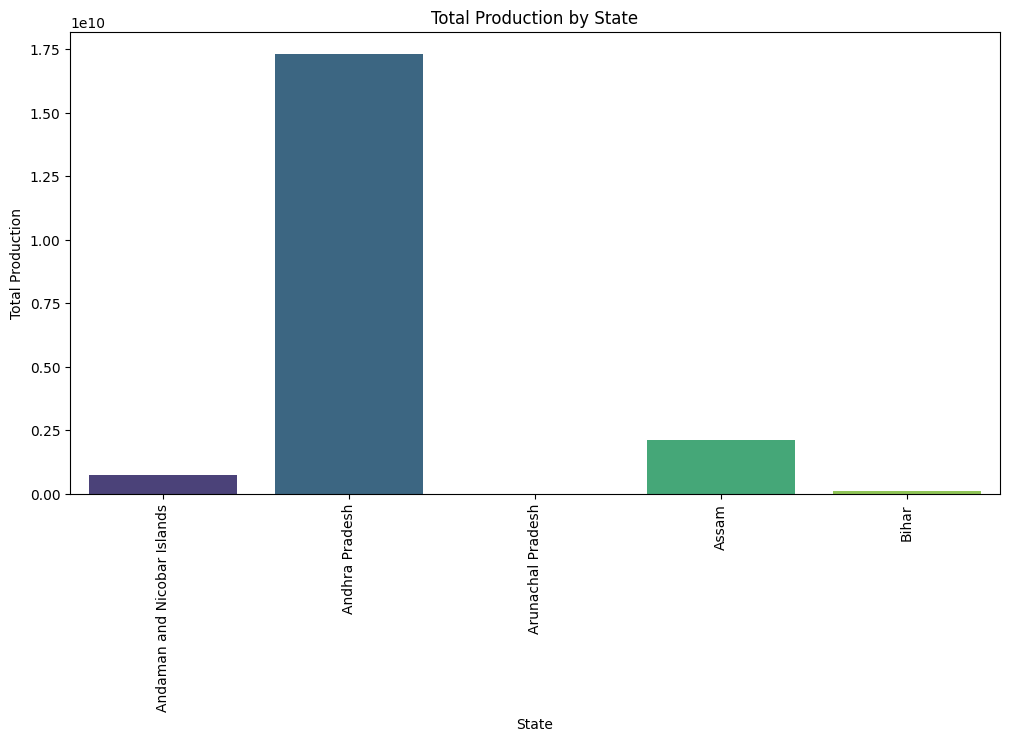

In [124]:
# Production by State
plt.figure(figsize=(12, 6))
sns.barplot(data=df,x='State_Name',y = 'Production', estimator=sum, errorbar=None, palette='viridis', legend=False)
plt.title('Total Production by State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.show()

<ipython-input-125-9795de1d2068>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Production', y='District_Name', data=production_by_district, palette='viridis')


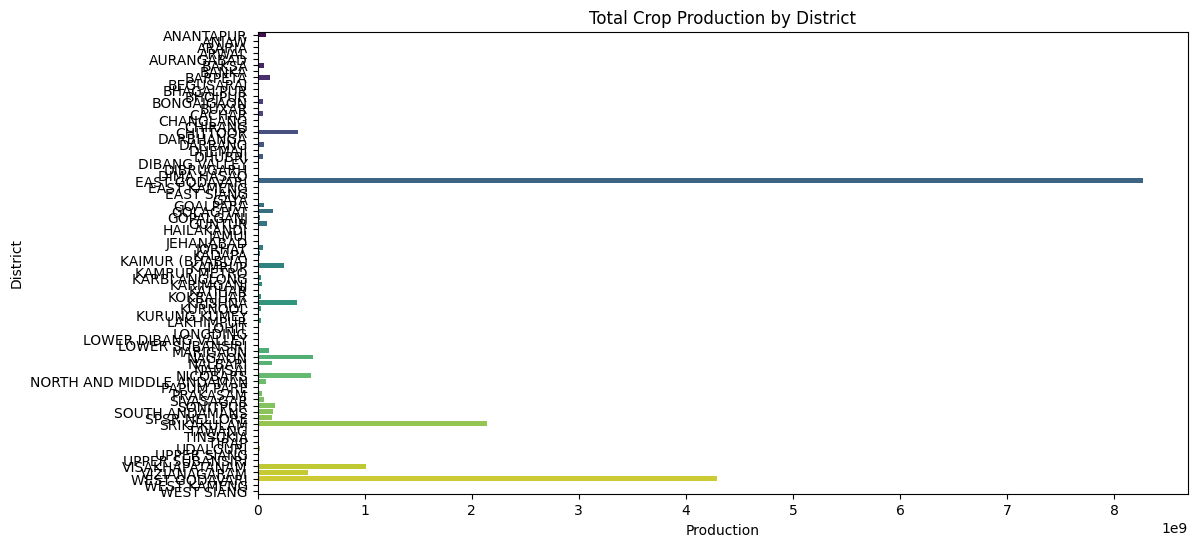

In [125]:
# Plot total production by district
plt.figure(figsize=(12,6))
sns.barplot(x='Production', y='District_Name', data=production_by_district, palette='viridis')
plt.title('Total Crop Production by District')
plt.xlabel('Production')
plt.ylabel('District')
plt.show()

<ipython-input-126-bfa0fdcade5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Production', y='Crop', data=production_by_crop,palette='viridis')


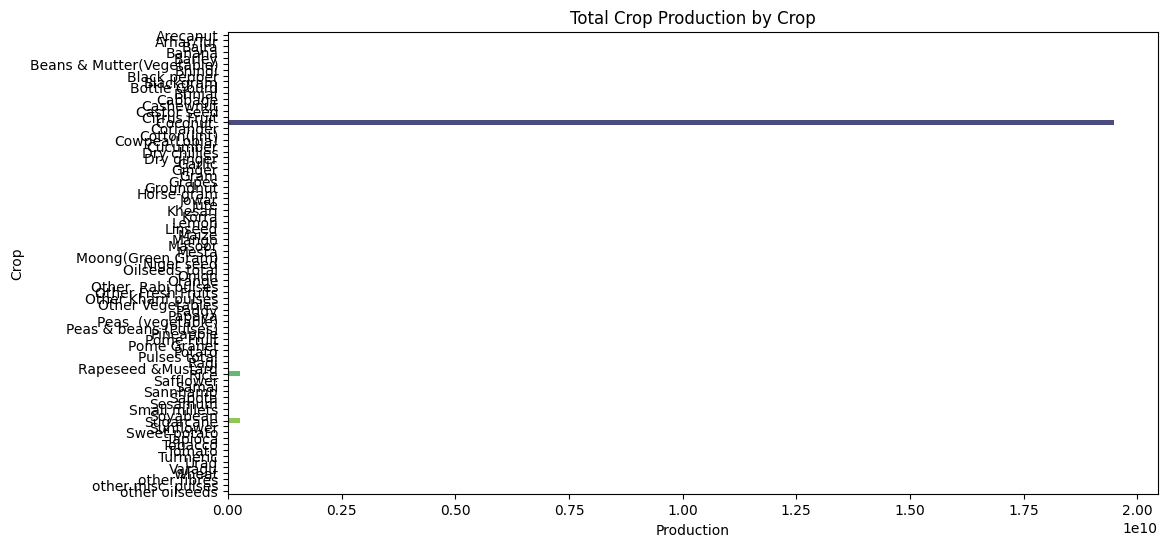

In [126]:
# Plot total production by crop
plt.figure(figsize=(12, 6))
sns.barplot(x='Production', y='Crop', data=production_by_crop,palette='viridis')
plt.title('Total Crop Production by Crop')
plt.xlabel('Production')
plt.ylabel('Crop')
plt.show()

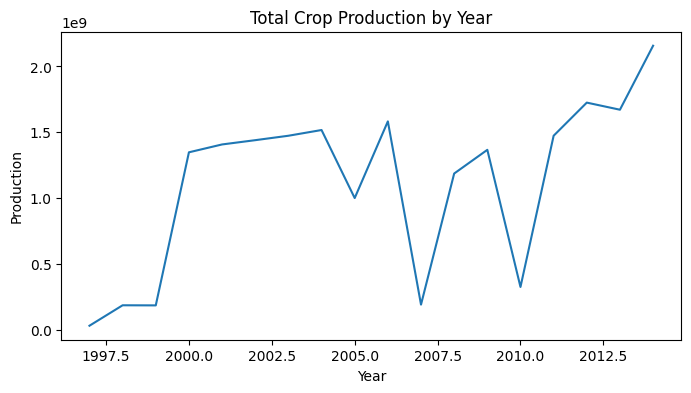

In [127]:
# Plot total production by year
plt.figure(figsize=(8, 4))
sns.lineplot(x='Crop_Year', y='Production', data=production_by_year)
plt.title('Total Crop Production by Year')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

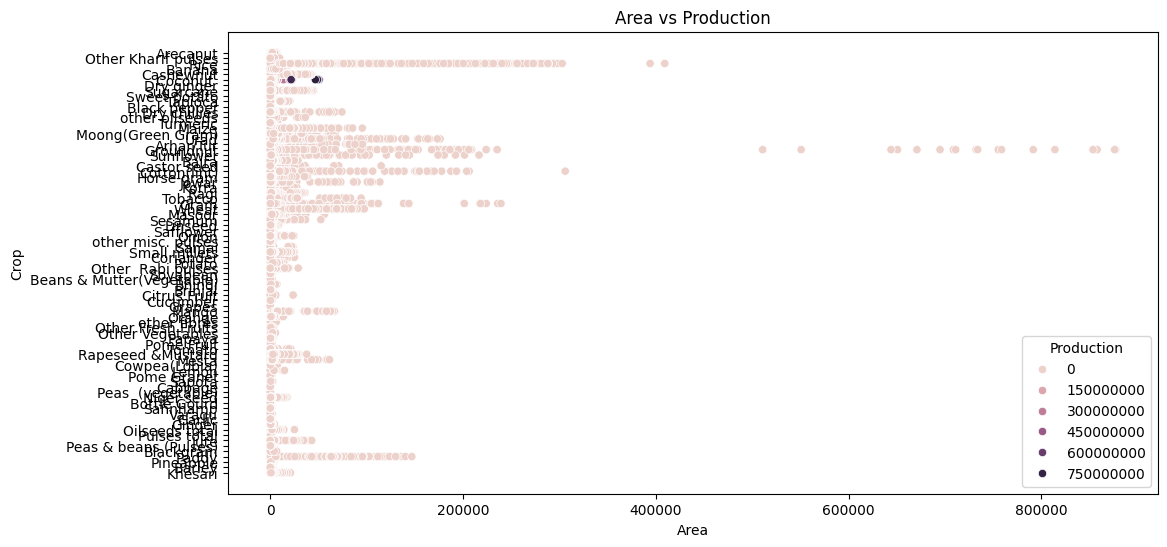

In [128]:
# Plotting the relationship between Area,Crop and Production
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Area', y='Crop', hue='Production')
plt.title('Area vs Production')
plt.show()

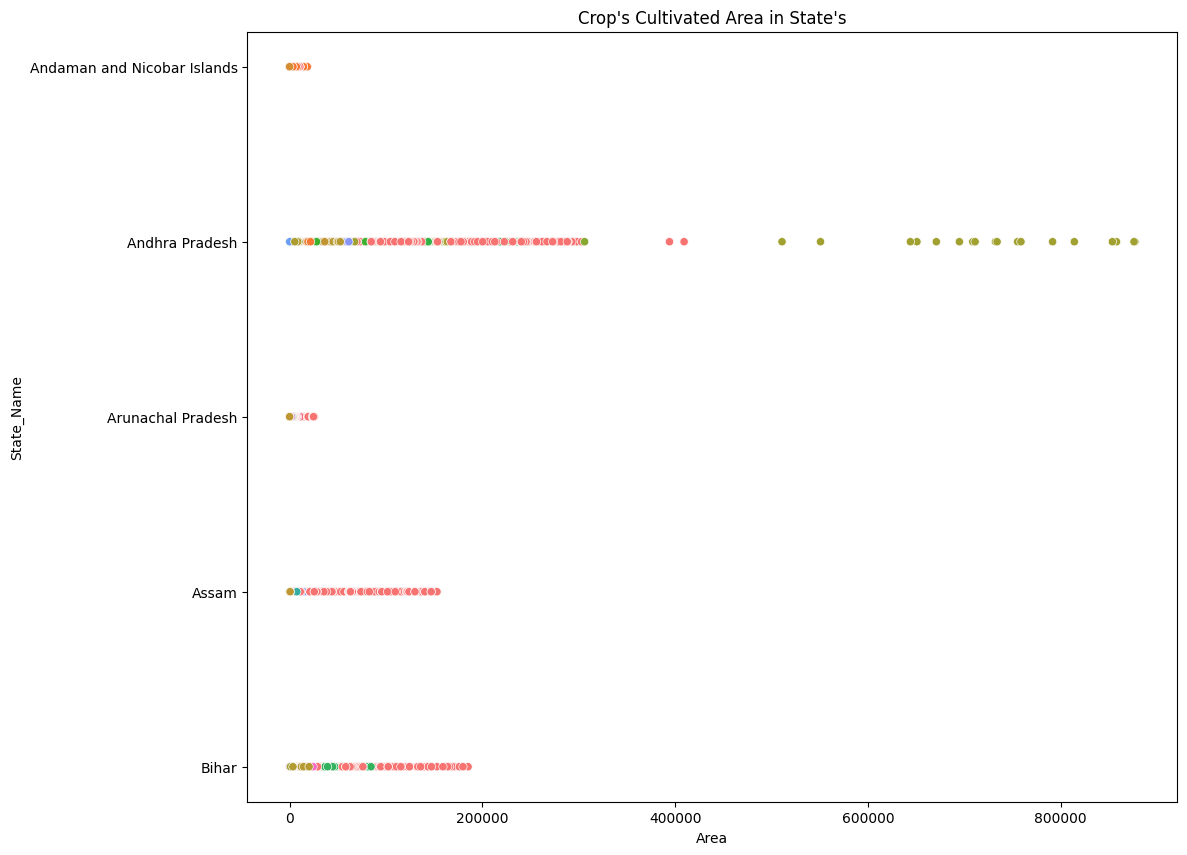

In [129]:
# Plotting the relationship between Area, State and Crop
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='Area', y='State_Name', hue='Crop', legend=False)
plt.title('Crop\'s Cultivated Area in State\'s')
plt.show()

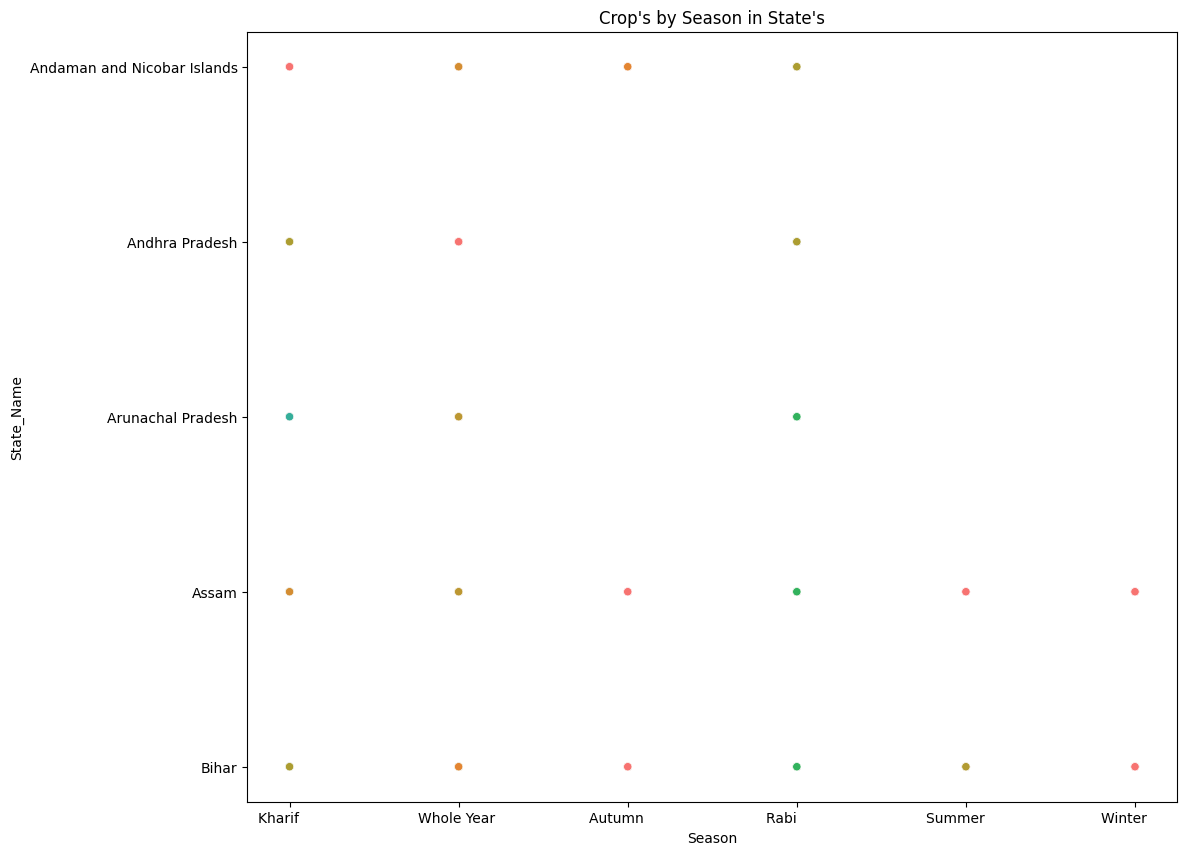

In [130]:
# Plotting the relationship between Area, State and Crop
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='Season', y='State_Name',hue = 'Crop', legend = False)
plt.title('Crop\'s by Season in State\'s')
plt.show()

<ipython-input-131-5e34e632dd34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Season', y='Production_per_Hectare',palette='viridis')


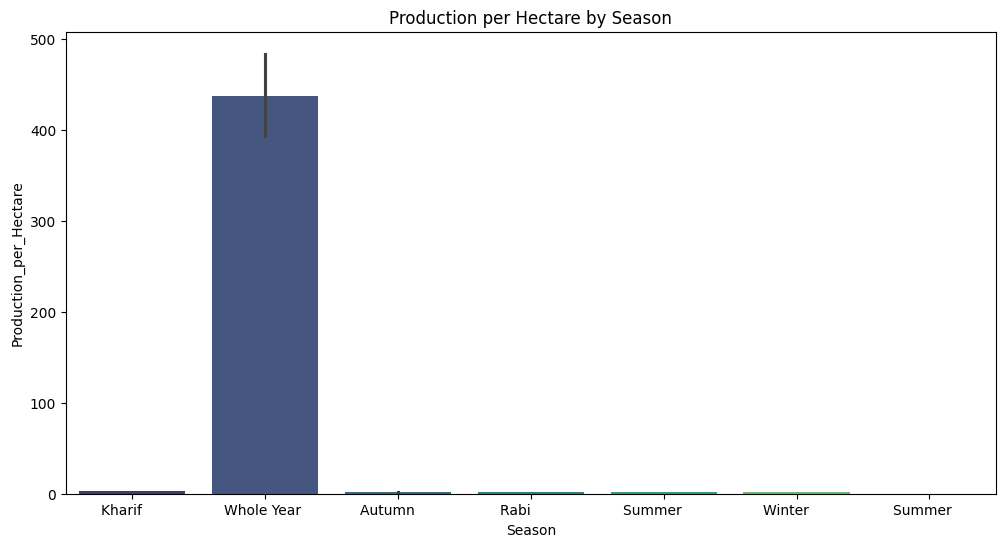

In [131]:
# Production per hectare by season
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Season', y='Production_per_Hectare',palette='viridis')
plt.title('Production per Hectare by Season')
plt.show()

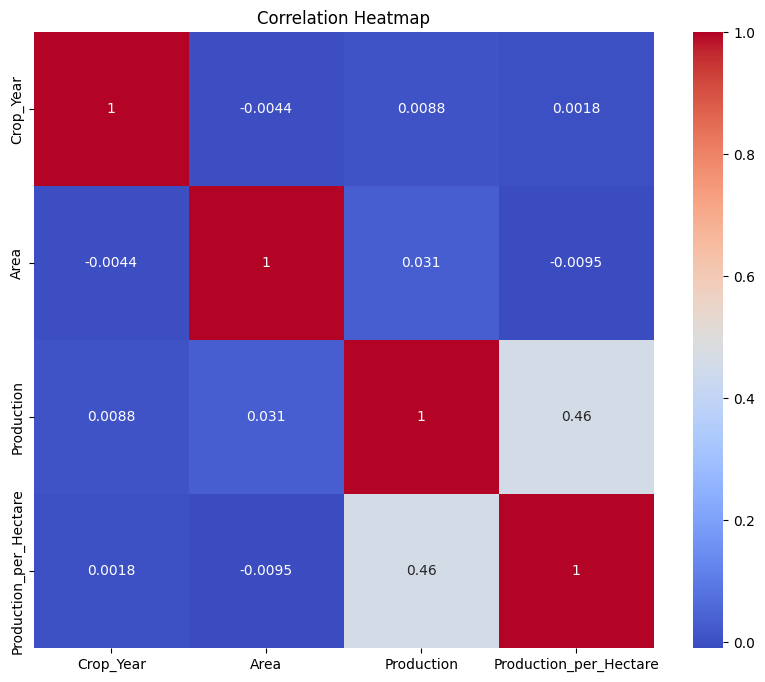

In [132]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Comparison and Insights
To make comparisons, we can create pivot tables and summary statistics.

In [133]:
# Pivot table for crop production by state and year
pivot_state_year = data.pivot_table(values='Production', index='State_Name', columns='Crop_Year', aggfunc='sum')
pivot_state_year

Crop_Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
State_Name,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,NaN,NaN,NaN,8.906091e+07,8.971870e+07,9.438714e+07,9.529645e+07,8.718650e+07,7.850788e+07,8.900975e+07,NaN,NaN,NaN,9.505591e+07,NaN,NaN,NaN,NaN
Andhra Pradesh,21093500.0,24997600.0,25276766.0,1.109120e+09,1.139997e+09,1.171722e+09,1.209746e+09,1.214759e+09,9.107880e+08,1.346439e+09,32008000.0,9.921911e+08,1.166252e+09,2.873887e+07,1.452100e+09,1.701193e+09,1.645887e+09,2.132282e+09
Arunachal Pradesh,267148.0,311280.0,325901.0,3.329420e+05,3.405550e+05,3.527260e+05,3.587950e+05,3.232030e+05,3.399220e+05,3.612000e+05,372950.0,3.888440e+05,5.623536e+05,3.993450e+05,4.206430e+05,4.344890e+05,4.502740e+05,4.813420e+05
Assam,5778334.0,156721536.0,157506193.0,1.433240e+08,1.709150e+08,1.676905e+08,1.618438e+08,2.106991e+08,6.383577e+06,1.417919e+08,153717001.0,1.876241e+08,1.945607e+08,1.952464e+08,1.382907e+07,1.354579e+07,1.524730e+07,1.532749e+07
Bihar,6305248.0,6437526.0,4550221.0,6.659661e+06,7.131776e+06,6.349852e+06,6.839007e+06,4.522382e+06,5.530579e+06,5.382663e+06,7400896.5,7.309750e+06,5.915652e+06,7.939428e+06,7.807043e+06,1.016689e+07,9.856780e+06,8.679089e+06


In [134]:
# Summary statistics for production by crop
crop_summary = data.groupby('Crop')['Production'].describe()
crop_summary

,count,mean,std,min,25%,50%,75%,max
Crop,,,,,,,,
Arecanut,458.0,2319.525786,2250.226540,1.00,985.0,1823.0,3096.50,31459.0
Arhar/Tur,1059.0,1837.707271,5670.742304,1.00,87.0,269.0,1000.50,64000.0
Bajra,400.0,3278.385000,6738.108867,1.00,83.0,918.5,3541.00,59344.0
Banana,700.0,39949.703786,64393.019629,33.00,12017.5,23121.5,37401.00,518880.0
Barley,243.0,846.119342,863.591294,4.00,112.5,577.0,1368.50,4110.0
...,...,...,...,...,...,...,...,...
Varagu,13.0,488.846154,539.506541,1.00,25.0,300.0,1000.00,1400.0
Wheat,963.0,31589.004154,58713.277762,1.00,224.5,1889.0,24177.50,291749.0
other fibres,2.0,0.000000,0.000000,0.00,0.0,0.0,0.00,0.0


# Advanced Analysis
We can perform more advanced analyses, such as identifying trends, forecasting future production, or analyzing the impact of climatic conditions.

# Example: Trend Analysis

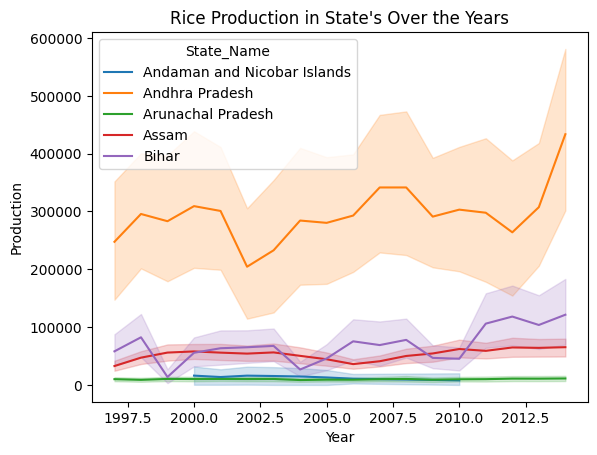

In [145]:
#  Production trend over years for a specific crop (e.g., Rice)

state_crop_trend = df[(df['Crop'] == 'Rice')]
sns.lineplot(x='Crop_Year', y='Production', hue = 'State_Name', data=state_crop_trend, color = 'red')
plt.title('Rice Production in State\'s Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

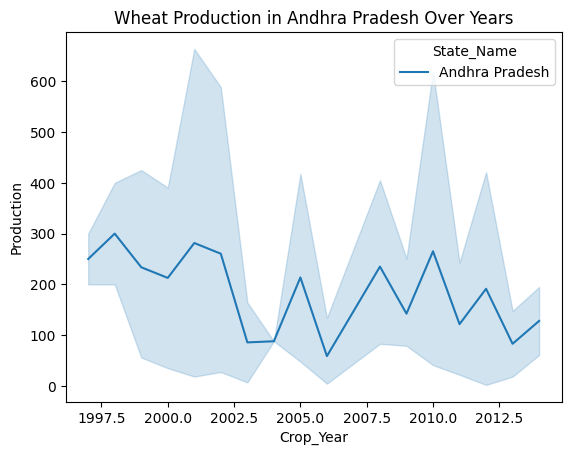

In [147]:
# Trend analysis for a specific crop in a specific state

wheat_data = df[(df['Crop'] == 'Wheat') & (df['State_Name'] == 'Andhra Pradesh')]

sns.lineplot(data=wheat_data, x='Crop_Year', y='Production', hue='State_Name')
plt.title('Wheat Production in Andhra Pradesh Over Years')
plt.show()

# Conclusion
By following these steps, you can comprehensively analyze crop production data in India, compare different metrics, and gain valuable insights into agricultural production trends.

# ***Thank Q**